## **Data Reading**

The first step of the analysis consists of reading and storing the data in a Pandas data frame.

In [ ]:
import pandas as pd

In [ ]:
# import data science 2023 salaries dataset into a pandas data frame

ds_salaries_df = pd.read_csv('ds_salaries.csv')

In [ ]:
# find number of rows and columns

ds_salaries_df.shape
print('Rows: {}, Columns: {}'.format(ds_salaries_df.shape[0], ds_salaries_df.shape[1]))

Rows: 3755, Columns: 11


In [ ]:
# visualize column names

ds_salaries_df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [ ]:
# check unique values of each column

for column in ds_salaries_df.columns:
    print('Column: {} - Unique Values: {}'.format(column, ds_salaries_df[column].unique()))

Column: work_year - Unique Values: [2023 2022 2020 2021]
Column: experience_level - Unique Values: ['SE' 'MI' 'EN' 'EX']
Column: employment_type - Unique Values: ['FT' 'CT' 'FL' 'PT']
Column: job_title - Unique Values: ['Principal Data Scientist' 'ML Engineer' 'Data Scientist'
 'Applied Scientist' 'Data Analyst' 'Data Modeler' 'Research Engineer'
 'Analytics Engineer' 'Business Intelligence Engineer'
 'Machine Learning Engineer' 'Data Strategist' 'Data Engineer'
 'Computer Vision Engineer' 'Data Quality Analyst'
 'Compliance Data Analyst' 'Data Architect'
 'Applied Machine Learning Engineer' 'AI Developer' 'Research Scientist'
 'Data Analytics Manager' 'Business Data Analyst' 'Applied Data Scientist'
 'Staff Data Analyst' 'ETL Engineer' 'Data DevOps Engineer' 'Head of Data'
 'Data Science Manager' 'Data Manager' 'Machine Learning Researcher'
 'Big Data Engineer' 'Data Specialist' 'Lead Data Analyst'
 'BI Data Engineer' 'Director of Data Science'
 'Machine Learning Scientist' 'MLOps Eng

In [ ]:
ds_salaries_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [ ]:
# summary of the data frame

ds_salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


## **Data Cleaning**

In [ ]:
# transform the column work_year into a string data type

ds_salaries_df['work_year'] = ds_salaries_df['work_year'].astype(str)

In [ ]:
print(ds_salaries_df['work_year'].dtypes)

object


In [ ]:
ds_salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   object
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(3), object(8)
memory usage: 322.8+ KB


In [ ]:
#find duplicate rows across all columns

duplicateRows = ds_salaries_df[ds_salaries_df.duplicated()]
duplicateRows

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
115,2023,SE,FT,Data Scientist,150000,USD,150000,US,0,US,M
123,2023,SE,FT,Analytics Engineer,289800,USD,289800,US,0,US,M
153,2023,MI,FT,Data Engineer,100000,USD,100000,US,100,US,M
154,2023,MI,FT,Data Engineer,70000,USD,70000,US,100,US,M
160,2023,SE,FT,Data Engineer,115000,USD,115000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
3439,2022,MI,FT,Data Scientist,78000,USD,78000,US,100,US,M
3440,2022,SE,FT,Data Engineer,135000,USD,135000,US,100,US,M
3441,2022,SE,FT,Data Engineer,115000,USD,115000,US,100,US,M
3586,2021,MI,FT,Data Engineer,200000,USD,200000,US,100,US,L


In [ ]:
ds_salaries_df.duplicated().sum()

1171

In [ ]:
# drop duplicate rows

ds_salaries_df = ds_salaries_df.drop_duplicates()

In [ ]:
ds_salaries_df.duplicated().sum()

0

In [ ]:
ds_salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2584 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           2584 non-null   object
 1   experience_level    2584 non-null   object
 2   employment_type     2584 non-null   object
 3   job_title           2584 non-null   object
 4   salary              2584 non-null   int64 
 5   salary_currency     2584 non-null   object
 6   salary_in_usd       2584 non-null   int64 
 7   employee_residence  2584 non-null   object
 8   remote_ratio        2584 non-null   int64 
 9   company_location    2584 non-null   object
 10  company_size        2584 non-null   object
dtypes: int64(3), object(8)
memory usage: 242.2+ KB


In [ ]:
# Removing leading and trailing white spaces from all string datatype columns
for col in ds_salaries_df.select_dtypes(include='object'):
    ds_salaries_df[col] = ds_salaries_df[col].str.strip()

# Printing the DataFrame after removing white spaces
ds_salaries_df

<ipython-input-19-8e5ac05da2f7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_salaries_df[col] = ds_salaries_df[col].str.strip()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [ ]:
# Getting all unique values in the 'job_title' column
unique_job_titles = ds_salaries_df['job_title'].unique()

# Converting unique job titles to a list
unique_job_titles_list = list(unique_job_titles)

# Printing the list of unique job titles
print(unique_job_titles_list)

['Principal Data Scientist', 'ML Engineer', 'Data Scientist', 'Applied Scientist', 'Data Analyst', 'Data Modeler', 'Research Engineer', 'Analytics Engineer', 'Business Intelligence Engineer', 'Machine Learning Engineer', 'Data Strategist', 'Data Engineer', 'Computer Vision Engineer', 'Data Quality Analyst', 'Compliance Data Analyst', 'Data Architect', 'Applied Machine Learning Engineer', 'AI Developer', 'Research Scientist', 'Data Analytics Manager', 'Business Data Analyst', 'Applied Data Scientist', 'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer', 'Head of Data', 'Data Science Manager', 'Data Manager', 'Machine Learning Researcher', 'Big Data Engineer', 'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer', 'Director of Data Science', 'Machine Learning Scientist', 'MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technician', 'Applied Machine Learning Scientist', 'Lead Data Scientist', 'Cloud Database Engineer', 'Financial Data Analyst', 'Data Infrastructure Engi

In [ ]:
# Printing the number of unique job titles
print("Number of unique job titles:", len(unique_job_titles_list))

Number of unique job titles: 93


**Find out subtle repetitions in unique_job_titles_list**

For the job title, there was a subtle repetition that could have affected the result of the analysis. Machine learning Engineer and ML Engineer were included in the dataset. This is basically the same job title written differently.

In [ ]:
# This dictionary (job_title_mappings) defines the mapping between similar job titles.
# In this case, it indicates that 'ML Engineer' should be replaced with 'Machine Learning Engineer'.

job_title_mappings = {
    'ML Engineer': 'Machine Learning Engineer'
}

ds_salaries_df['job_title'] = ds_salaries_df['job_title'].map(job_title_mappings).fillna(ds_salaries_df['job_title'])

'''
Here, the map function is used to replace values in the 'job_title' column based on the mappings defined in job_title_mappings.
The fillna method is then used to fill any NaN (Not a Number) values with the original values from the 'job_title' column.
This step ensures that if a job title is not found in the mapping, it remains unchanged.
'''

ds_salaries_df

<ipython-input-22-8192c9019f2e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_salaries_df['job_title'] = ds_salaries_df['job_title'].map(job_title_mappings).fillna(ds_salaries_df['job_title'])


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,Machine Learning Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,Machine Learning Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [ ]:
# Getting all unique values in the 'job_title' column
new_unique_job_titles = ds_salaries_df['job_title'].unique()

# Converting unique job titles to a list
new_unique_job_titles_list = list(new_unique_job_titles)

# Printing the number of unique job titles
print("Number of new unique job titles:", len(new_unique_job_titles_list))

Number of new unique job titles: 92


In [ ]:
#find duplicate rows across all columns

newduplicateRows = ds_salaries_df[ds_salaries_df.duplicated()]
newduplicateRows

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1364,2023,SE,FT,Machine Learning Engineer,220000,USD,220000,US,0,US,M
1365,2023,SE,FT,Machine Learning Engineer,150000,USD,150000,US,0,US,M
1525,2023,SE,FT,Machine Learning Engineer,200000,USD,200000,US,0,US,M
1660,2023,SE,FT,Machine Learning Engineer,135000,USD,135000,US,0,US,M
1724,2023,SE,FT,Machine Learning Engineer,289076,USD,289076,US,0,US,M
1725,2023,SE,FT,Machine Learning Engineer,202353,USD,202353,US,0,US,M
2792,2022,SE,FT,Machine Learning Engineer,195400,USD,195400,US,100,US,L
2793,2022,SE,FT,Machine Learning Engineer,131300,USD,131300,US,100,US,L


In [ ]:
ds_salaries_df.duplicated().sum()

8

In [ ]:
# drop duplicate rows

ds_salaries_df = ds_salaries_df.drop_duplicates()

In [ ]:
ds_salaries_df.duplicated().sum()

0

In [ ]:
ds_salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2576 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           2576 non-null   object
 1   experience_level    2576 non-null   object
 2   employment_type     2576 non-null   object
 3   job_title           2576 non-null   object
 4   salary              2576 non-null   int64 
 5   salary_currency     2576 non-null   object
 6   salary_in_usd       2576 non-null   int64 
 7   employee_residence  2576 non-null   object
 8   remote_ratio        2576 non-null   int64 
 9   company_location    2576 non-null   object
 10  company_size        2576 non-null   object
dtypes: int64(3), object(8)
memory usage: 241.5+ KB


In [ ]:
# number of rows and columns in dataset without any duplicates
ds_salaries_df.shape
print('Rows: {}, Columns: {}'.format(ds_salaries_df.shape[0], ds_salaries_df.shape[1]))

Rows: 2576, Columns: 11


**Replace values in dataset**

## **Expolatory Data Analysis**

**Trendiest and Most Lucrative Job Title: Which is the trendiest and most lucrative job title in the data science industry?**

In [ ]:
# Group the dataframe by company location and job title, and aggregate the salaries into a list
salary_data_by_country = ds_salaries_df.groupby(['company_location', 'job_title'])['salary_in_usd'].apply(list)

salary_data_by_country

company_location  job_title                    
AE                Lead Data Scientist                                                       [115000]
                  Machine Learning Engineer                                          [120000, 65000]
AL                3D Computer Vision Researcher                                              [10000]
AM                Machine Learning Engineer                                                  [50000]
AR                Data Analyst                                                               [50000]
                                                                         ...                        
US                Product Data Analyst                                              [100000, 140000]
                  Research Engineer                [189110, 139000, 203000, 133000, 230000, 20000...
                  Research Scientist               [220000, 130000, 110000, 210000, 136000, 21000...
                  Staff Data Scientist     

Most Trendiest Job Title By Country

In [ ]:
# Group the dataframe by company location and job title, and aggregate the salaries into a list
salary_data_by_country = ds_salaries_df.groupby(['company_location', 'job_title'])['salary_in_usd'].apply(list)

salary_data_by_country

company_location  job_title                    
AE                Lead Data Scientist                                                       [115000]
                  Machine Learning Engineer                                          [120000, 65000]
AL                3D Computer Vision Researcher                                              [10000]
AM                Machine Learning Engineer                                                  [50000]
AR                Data Analyst                                                               [50000]
                                                                         ...                        
US                Product Data Analyst                                              [100000, 140000]
                  Research Engineer                [189110, 139000, 203000, 133000, 230000, 20000...
                  Research Scientist               [220000, 130000, 110000, 210000, 136000, 21000...
                  Staff Data Scientist     

In [ ]:
df_salary_data = pd.DataFrame(salary_data_by_country.tolist(), index=salary_data_by_country.index)
# Find the number of reporting for each job title and highest salary for respective country
df_salary_data['Most Common Job'] = df_salary_data.apply(lambda row: row.count(), axis=1)
df_salary_data['Salary (USD)'] = df_salary_data.max(axis=1)

df_salary_data = df_salary_data.drop(range(487), axis=1)
df_salary_data

Most Common Job  Salary (USD)
company_location job_title                                                   
AE               Lead Data Scientist                          1      115000.0
                 Machine Learning Engineer                    2      120000.0
AL               3D Computer Vision Researcher                1       10000.0
AM               Machine Learning Engineer                    1       50000.0
AR               Data Analyst                                 1       50000.0
...                                                         ...           ...
US               Product Data Analyst                         2      140000.0
                 Research Engineer                           27      293000.0
                 Research Scientist                          43      450000.0
                 Staff Data Scientist                         1      105000.0
VN               Data Engineer                                1       12000.0

[352 rows x 2 columns]

In [ ]:
df_most_common_job = df_salary_data

# Find the index of the row with the highest value in the "Most Common Job" column for each company location
max_common_job_idx = df_most_common_job.groupby('company_location')['Most Common Job'].idxmax()

# Select only the rows with the highest value in the "Most Common Job" column
df_most_common_job = df_most_common_job.loc[max_common_job_idx]

# Reset the index to make 'company_location' a column
df_most_common_job = df_most_common_job.reset_index()

df_most_common_job = df_most_common_job.rename(columns={'job_title': 'Most Common Job Title', 'company_location': 'Country'})


# Find the most common job title and highest salary for each country
df_salary_data = df_salary_data.drop('Most Common Job', axis=1)

# Print the DataFrame
df_most_common_job

,Country,Most Common Job Title,Most Common Job,Salary (USD)
0,AE,Machine Learning Engineer,2,120000.0
1,AL,3D Computer Vision Researcher,1,10000.0
2,AM,Machine Learning Engineer,1,50000.0
3,AR,Data Analyst,1,50000.0
4,AS,3D Computer Vision Researcher,1,20000.0
...,...,...,...,...
67,TH,Data Science Consultant,1,29453.0
68,TR,Data Scientist,3,25000.0
69,UA,AI Developer,2,108000.0
70,US,Data Engineer,487,324000.0


Most Lucrative Job Title By Country

In [ ]:
df_highest_paying_job = df_salary_data
# Find the index of the row with the highest value in the "Most Common Job" column for each company location
highest_paid_job_idx = df_salary_data.groupby('company_location')['Salary (USD)'].idxmax()

# Select only the rows with the highest value in the "Most Common Job" column
df_highest_paying_job = df_highest_paying_job.loc[highest_paid_job_idx]
df_highest_paying_job = df_highest_paying_job.reset_index()
df_highest_paying_job = df_highest_paying_job.rename(columns={'job_title': 'Highest Paying Job Title', 'company_location': 'Country'})
df_highest_paying_job

,Country,Highest Paying Job Title,Salary (USD)
0,AE,Machine Learning Engineer,120000.0
1,AL,3D Computer Vision Researcher,10000.0
2,AM,Machine Learning Engineer,50000.0
3,AR,Data Analyst,50000.0
4,AS,Business Data Analyst,50000.0
...,...,...,...
67,TH,Data Science Consultant,29453.0
68,TR,Data Engineer,28016.0
69,UA,AI Developer,108000.0
70,US,Research Scientist,450000.0


By Country, Most Common Job V/S Highest paid Job

In [ ]:
df1 = df_highest_paying_job.rename(columns={'Salary (USD)': 'Highest Paid Job Salary (USD)'})
df2 = df_most_common_job.rename(columns={'Salary (USD)': 'Most Common Job Salary (USD)'})
df2 = df2.drop('Most Common Job', axis=1)

df_by_country_most_common_vs_highest_paid = pd.merge(df2, df1, on='Country')

# Print the merged DataFrame
df_by_country_most_common_vs_highest_paid

,Country,Most Common Job Title,Most Common Job Salary (USD),Highest Paying Job Title,Highest Paid Job Salary (USD)
0,AE,Machine Learning Engineer,120000.0,Machine Learning Engineer,120000.0
1,AL,3D Computer Vision Researcher,10000.0,3D Computer Vision Researcher,10000.0
2,AM,Machine Learning Engineer,50000.0,Machine Learning Engineer,50000.0
3,AR,Data Analyst,50000.0,Data Analyst,50000.0
4,AS,3D Computer Vision Researcher,20000.0,Business Data Analyst,50000.0
...,...,...,...,...,...
67,TH,Data Science Consultant,29453.0,Data Science Consultant,29453.0
68,TR,Data Scientist,25000.0,Data Engineer,28016.0
69,UA,AI Developer,108000.0,AI Developer,108000.0
70,US,Data Engineer,324000.0,Research Scientist,450000.0


**Demographic Pay Gaps: Are there any demographic pay gaps within the data science field ?**

In [ ]:
df_worlds_most_common_job_idx = df_most_common_job['Most Common Job'].idxmax()
df_worlds_most_common_job = df_most_common_job
df_worlds_most_common_job = df_worlds_most_common_job.rename(columns={'Most Common Job Title': 'Worlds Most Common Job Title'})
df_worlds_most_common_job = df_worlds_most_common_job.loc[df_worlds_most_common_job_idx]
df_worlds_most_common_job

Country                                    US
Worlds Most Common Job Title    Data Engineer
Most Common Job                           487
Salary (USD)                         324000.0
Name: 70, dtype: object

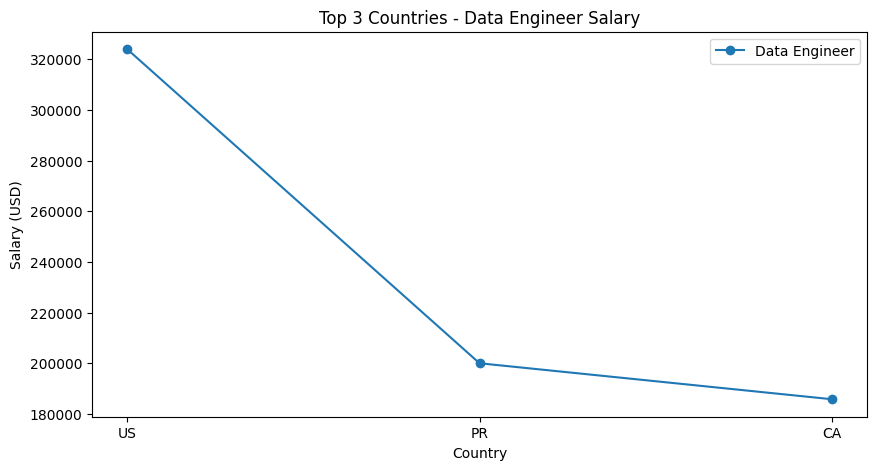

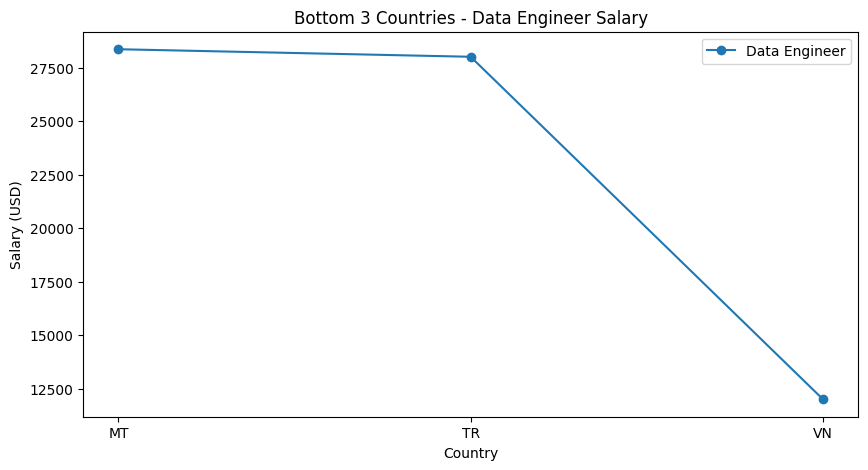

In [ ]:
import matplotlib.pyplot as plt
df_salary_data.reset_index(inplace=True)
data_engineer_roles = df_salary_data['job_title'] == 'Data Engineer'
df_data_engineer_role = df_salary_data[data_engineer_roles]
df_data_engineer_role = df_data_engineer_role.sort_values(by='Salary (USD)', ascending=False)
top_df = df_data_engineer_role.head(3)
bottom_df = df_data_engineer_role.tail(3)

# Create a bar plot for the top 3 countries
plt.figure(figsize=(10, 5))
plt.plot(top_df['company_location'], top_df['Salary (USD)'], marker='o')
plt.xlabel('Country')
plt.ylabel('Salary (USD)')
plt.title('Top 3 Countries - Data Engineer Salary')
plt.legend(['Data Engineer'])
plt.show()

# Create a line graph for the bottom 3 countries
plt.figure(figsize=(10, 5))
plt.plot(bottom_df['company_location'], bottom_df['Salary (USD)'], marker='o')
plt.xlabel('Country')
plt.ylabel('Salary (USD)')
plt.title('Bottom 3 Countries - Data Engineer Salary')
plt.legend(['Data Engineer'])
plt.show()

In [ ]:
table_data = []
for current_country, job_title, count_of_common, current_salary in df_most_common_job.values:
    max_salary = 0
    temp = []
    for Country, job_title_max, salary in df_salary_data.values:
        if job_title == job_title_max:
            if temp == []:
                if current_salary >= salary:
                    temp = [current_country, current_salary]
                else:
                    temp = [Country, salary]
            elif salary > temp[1]:
                temp = [Country, salary]
    table_data.append(temp)


df_highest_paying_country = pd.DataFrame(table_data, columns=["Highest Paying Country", "HIghest Paying Country Salary"])

df_most_common_job_and_its_highest_paying_country = pd.merge(df_most_common_job, df_highest_paying_country, left_index=True, right_index=True)
df_most_common_job_and_its_highest_paying_country = df_most_common_job_and_its_highest_paying_country.drop(['Most Common Job'], axis=1)

df_most_common_job_and_its_highest_paying_country

,Country,Most Common Job Title,Salary (USD),Highest Paying Country,HIghest Paying Country Salary
0,AE,Machine Learning Engineer,120000.0,US,342300.0
1,AL,3D Computer Vision Researcher,10000.0,CR,50000.0
2,AM,Machine Learning Engineer,50000.0,US,342300.0
3,AR,Data Analyst,50000.0,GB,430967.0
4,AS,3D Computer Vision Researcher,20000.0,CR,50000.0
...,...,...,...,...,...
67,TH,Data Science Consultant,29453.0,US,145000.0
68,TR,Data Scientist,25000.0,US,412000.0
69,UA,AI Developer,108000.0,IN,300000.0
70,US,Data Engineer,324000.0,US,324000.0


**Compensation trends:** Are organizations staying up-to-date with the compensation trends in the industry? ​

In [ ]:
#Group data by Company Size and Year and calculate the average salaries
avg_salary_by_company_size = ds_salaries_df.groupby(['company_size', 'work_year'])['salary_in_usd'].mean().reset_index()

print("Average Salary Trend by Company Size")
avg_salary_by_company_size

Average Salary Trend by Company Size


,company_size,work_year,salary_in_usd
0,L,2020,103574.117647
1,L,2021,106554.480000
2,L,2022,116726.224138
3,L,2023,119213.824324
4,M,2020,106626.437500
5,M,2021,74463.035714
6,M,2022,135775.657366
7,M,2023,150078.694497
8,S,2020,70958.560000
9,S,2021,82129.446809


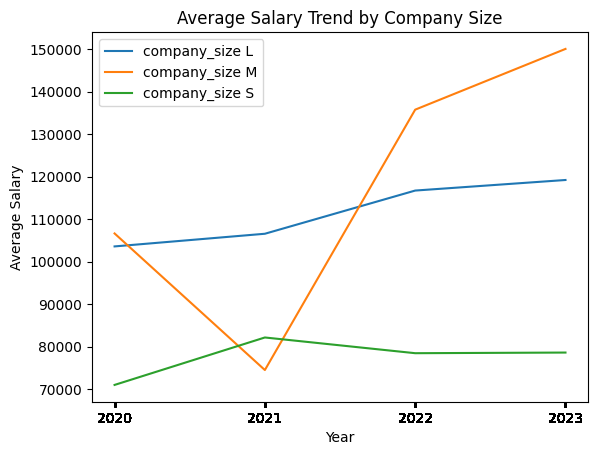

In [ ]:
#Plot the Average Salary Trend by Company Size Over the Years
x_labels = ds_salaries_df['work_year']

for size in ['L', 'M', 'S']:
    subset = avg_salary_by_company_size[avg_salary_by_company_size['company_size'] == size]
    plt.plot(subset['work_year'], subset['salary_in_usd'], label =f'company_size {size}')

plt.xlabel('Year')
plt.ylabel('Average Salary')
plt.title('Average Salary Trend by Company Size')
plt.xticks(x_labels)
plt.legend()

plt.show()

What kind of talent are companies looking for based on the highest paying job title?​

In [ ]:
#Group data by job title and calculating average salary
avg_salary = ds_salaries_df.groupby('job_title')['salary_in_usd'].mean()

print("Average Salaries of Each Job Title")
avg_salary

Average Salaries of Each Job Title


job_title
3D Computer Vision Researcher     21352.250000
AI Developer                     136666.090909
AI Programmer                     55000.000000
AI Scientist                     110120.875000
Analytics Engineer               150151.747253
                                     ...      
Research Engineer                165909.393939
Research Scientist               153486.369231
Software Data Engineer            62510.000000
Staff Data Analyst                15000.000000
Staff Data Scientist             105000.000000
Name: salary_in_usd, Length: 92, dtype: float64

In [ ]:
#Find the top 10 highest paying job titles
top_paying_jobs = avg_salary.sort_values(ascending=False).head(10)

print("Top 10 Highest Paying Job Titles:")
top_paying_jobs

Top 10 Highest Paying Job Titles:


job_title
Data Science Tech Lead                 375000.000000
Cloud Data Architect                   250000.000000
Data Lead                              212500.000000
Data Analytics Lead                    211254.500000
Principal Data Scientist               198171.125000
Director of Data Science               195140.727273
Principal Data Engineer                192500.000000
Machine Learning Software Engineer     192420.000000
Applied Scientist                      190342.580645
Principal Machine Learning Engineer    190000.000000
Name: salary_in_usd, dtype: float64

In [ ]:
# Getting the rows corresponding to the highest paying job title
most_popular_job = ds_salaries_df[ds_salaries_df['job_title'] == 'Data Science Tech Lead']

print("The Highest Paying Job Title")
most_popular_job

The Highest Paying Job Title


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
2359,2022,SE,FT,Data Science Tech Lead,375000,USD,375000,US,50,US,L


**Salary Trends Over the Years:** Can we identify trends in salaries over time, such as year-over-year growth or fluctuations?

In [ ]:
#Calculate the average salary each year
avg_salary_by_year = ds_salaries_df.groupby('work_year')['salary_in_usd'].mean()
avg_salary_by_year

work_year
2020     93353.426667
2021     93637.385965
2022    130117.629564
2023    146724.801739
Name: salary_in_usd, dtype: float64

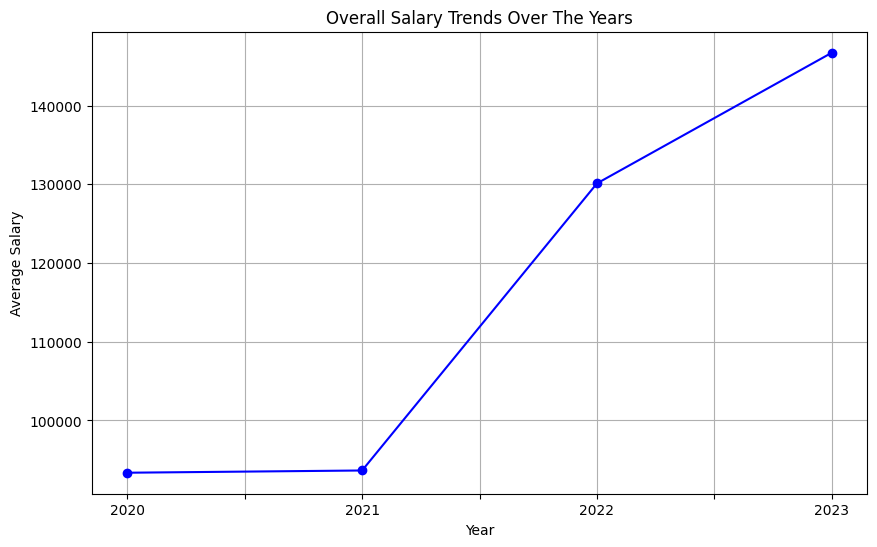

In [ ]:
#Plot the average salary by year using a line graph
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
avg_salary_by_year.plot(marker='o', color='b')
plt.title('Overall Salary Trends Over The Years')
plt.xlabel('Year')
plt.ylabel('Average Salary')
#plt.xticks(x_labels)
plt.grid(True)

plt.show()

What does the salary trend for Data Analysts look like over the years? ​

In [ ]:
#Get all data entrys for Data Analysts
data_analyst = ds_salaries_df[ds_salaries_df['job_title'] == 'Data Analyst']

data_analyst.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
11,2023,SE,FT,Data Analyst,130000,USD,130000,US,100,US,M
12,2023,SE,FT,Data Analyst,100000,USD,100000,US,100,US,M
19,2023,MI,FT,Data Analyst,150000,USD,150000,US,100,US,M
20,2023,MI,FT,Data Analyst,110000,USD,110000,US,100,US,M
37,2023,MI,FT,Data Analyst,105380,USD,105380,US,0,US,M


In [ ]:
#Calculate the average salaries by year
da_avg_salary_over_years = data_analyst.groupby(['work_year'])['salary_in_usd'].mean().reset_index()
da_avg_salary_over_years

,work_year,salary_in_usd
0,2020,42705.000000
1,2021,75024.952381
2,2022,102893.691860
3,2023,113300.538462


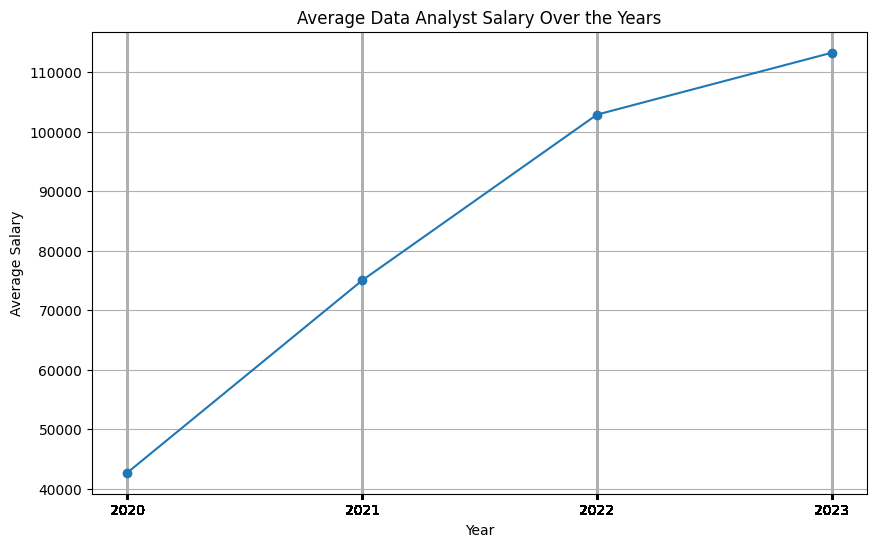

In [ ]:
#Plot Data Analyst's average salary over the years using a line graph

plt.figure(figsize=(10, 6))
plt.plot(da_avg_salary_over_years['work_year'], da_avg_salary_over_years['salary_in_usd'], marker='o', linestyle='-')
plt.title('Average Data Analyst Salary Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Salary')
plt.xticks(x_labels)
plt.grid(True)
plt.show()

What does the salary trend for BI (Data) Analyst look like over the years? ​

In [ ]:
#Get all data entrys for BI Analysts and BI Data Analysts
BI_analyst = ['BI Analyst', 'BI Data Analyst']
BI_da_analyst = ds_salaries_df[ds_salaries_df['job_title'].isin(BI_analyst)]

BI_da_analyst.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
808,2023,SE,FT,BI Analyst,160000,USD,160000,US,0,US,M
809,2023,SE,FT,BI Analyst,135000,USD,135000,US,0,US,M
984,2023,SE,FT,BI Data Analyst,67000,EUR,71897,DE,100,DE,M
1521,2023,SE,FT,BI Analyst,125000,USD,125000,US,0,US,M
1522,2023,SE,FT,BI Analyst,110000,USD,110000,US,0,US,M


In [ ]:
#Calculate the average salaries by year
BI_avg_salary_over_years = BI_da_analyst.groupby(['work_year'])['salary_in_usd'].mean().reset_index()
BI_avg_salary_over_years

,work_year,salary_in_usd
0,2020,98000.000000
1,2021,70106.200000
2,2022,61551.846154
3,2023,120379.400000


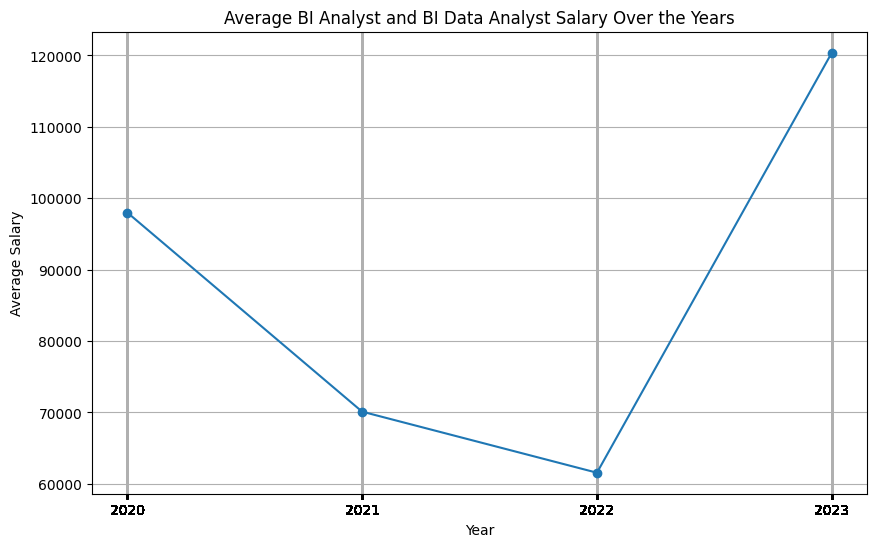

In [ ]:
#Plot BI (Data) Analyst's average salary over the years using a line graph

plt.figure(figsize=(10, 6))
plt.plot(BI_avg_salary_over_years['work_year'], BI_avg_salary_over_years['salary_in_usd'], marker='o', linestyle='-')
plt.title('Average BI Analyst and BI Data Analyst Salary Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Salary')
plt.xticks(x_labels)
plt.grid(True)
plt.show()

Salary variation based on company size: Do salaries vary by company size (small, medium, and large)?​

In [ ]:
ds_salaries_df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,Machine Learning Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,Machine Learning Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


Plotting a box plot for company size and salary in usd

<Axes: xlabel='company_size', ylabel='salary_in_usd'>

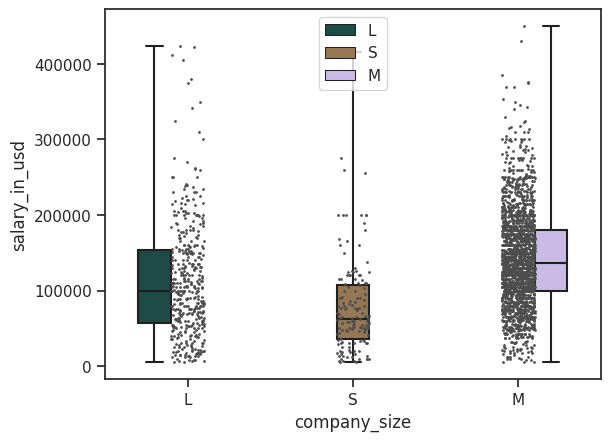

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

#plotting box plot
sns.boxplot(ds_salaries_df, x="company_size", y="salary_in_usd", hue="company_size",
    whis=[0, 100], width=0.6, palette="cubehelix",
)
# Add in points to show each observation
sns.stripplot(ds_salaries_df, x="company_size", y="salary_in_usd", size=2, color=".3")

#ax.xaxis.grid(True)
#ax.set(ylabel="")

Experience Level with company size

In [ ]:
#creating a smaller dataframe which groups company size and their values by experience level
exp_size = ds_salaries_df.groupby('experience_level')['company_size'].value_counts()
exp_size_df=pd.DataFrame(exp_size)
exp_size_df

company_size
experience_level company_size              
EN               M                      125
                 L                       96
                 S                       49
EX               M                       77
                 L                       13
                 S                        6
MI               M                      483
                 L                      132
                 S                       49
SE               M                     1337
                 L                      166
                 S                       43

In [ ]:
#renaming the column name as count
exp_size_df.rename(columns = {'company_size':'Count'}, inplace = True)
exp_size_df

Count
experience_level company_size       
EN               M               125
                 L                96
                 S                49
EX               M                77
                 L                13
                 S                 6
MI               M               483
                 L               132
                 S                49
SE               M              1337
                 L               166
                 S                43

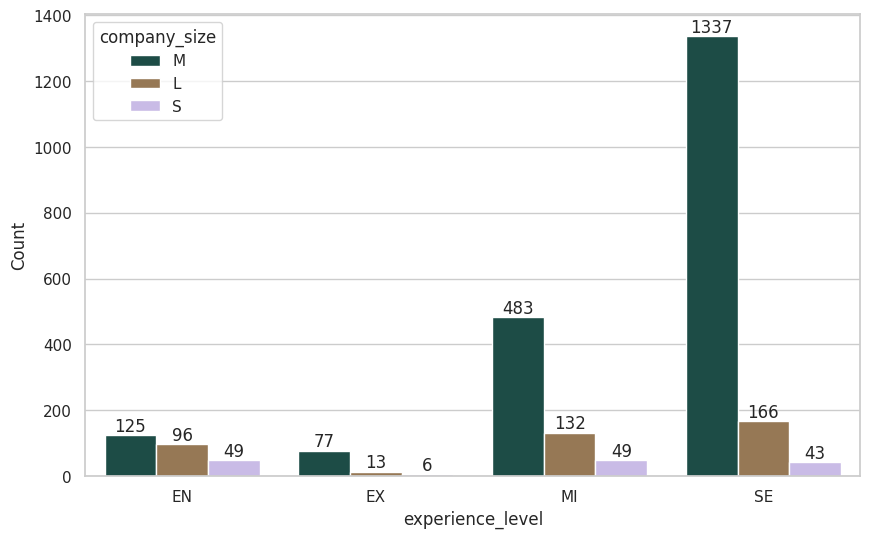

In [ ]:
#plotting a grouped bar chart
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='experience_level', y='Count', hue='company_size',
                 palette="cubehelix",data=exp_size_df.reset_index())

# Add values above bars
for i in ax.containers:
    ax.bar_label(i,)

Median of salary vs company size

In [ ]:
# median of salary vs company size
salary_vs_company_size = ds_salaries_df.groupby('company_size')['salary_in_usd'].median()
salary_vs_company_size

company_size
L    100000.0
M    136975.0
S     62726.0
Name: salary_in_usd, dtype: float64

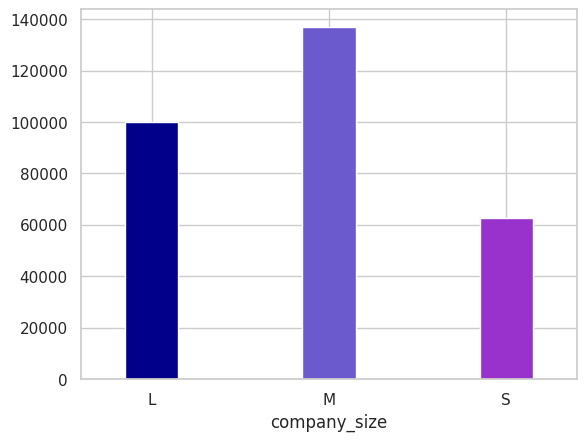

In [ ]:
#plotting median salary vs company size
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

fig, ax = plt.subplots()
bar_colors = ['darkblue', 'slateblue', 'darkorchid']
ax = salary_vs_company_size.plot.bar(x='company_size',
   y='salary_in_usd', width= 0.3, rot=0, color=bar_colors)

plt.show()

Do employment types have a dependency on experience?

In [ ]:
# counting the value of each experience level for employment type
employment_vs_experience = ds_salaries_df.groupby('experience_level')['employment_type'].value_counts()
employment_vs_experience

experience_level  employment_type
EN                FT                  252
                  PT                   14
                  CT                    2
                  FL                    2
EX                FT                   95
                  CT                    1
MI                FT                  651
                  CT                    5
                  FL                    5
                  PT                    3
SE                FT                 1541
                  FL                    3
                  CT                    2
Name: employment_type, dtype: int64

In [ ]:
# converting the previous into a dataframe
employment_vs_experience_dt=pd.DataFrame(employment_vs_experience )

employment_vs_experience_dt.rename(columns = {'employment_type':'Count'}, inplace = True)
employment_vs_experience_dt

Count
experience_level employment_type       
EN               FT                 252
                 PT                  14
                 CT                   2
                 FL                   2
EX               FT                  95
                 CT                   1
MI               FT                 651
                 CT                   5
                 FL                   5
                 PT                   3
SE               FT                1541
                 FL                   3
                 CT                   2

Finding correlation between experience level and employment type.

In [ ]:
from scipy.stats import chi2_contingency

#Finding correlation

cross_tab = pd.crosstab(index=ds_salaries_df['experience_level'],columns=ds_salaries_df['employment_type'])
chi_square_result = chi2_contingency(cross_tab,)
chi_square_result

Chi2ContingencyResult(statistic=107.89611391840003, pvalue=3.9399062330006367e-19, dof=9, expected_freq=array([[1.04813665e+00, 1.04813665e+00, 2.66121894e+02, 1.78183230e+00],
       [3.72670807e-01, 3.72670807e-01, 9.46211180e+01, 6.33540373e-01],
       [2.57763975e+00, 2.57763975e+00, 6.54462733e+02, 4.38198758e+00],
       [6.00155280e+00, 6.00155280e+00, 1.52379425e+03, 1.02026398e+01]]))

H0 - The two columns are not correlated ; H1 - The two columns are correlated
Result - The probability of H0 being true
In this case, since p-value is very less (in comparison of alpha, say 0.05), we will reject the H0 and conclude that the two columns are correlated

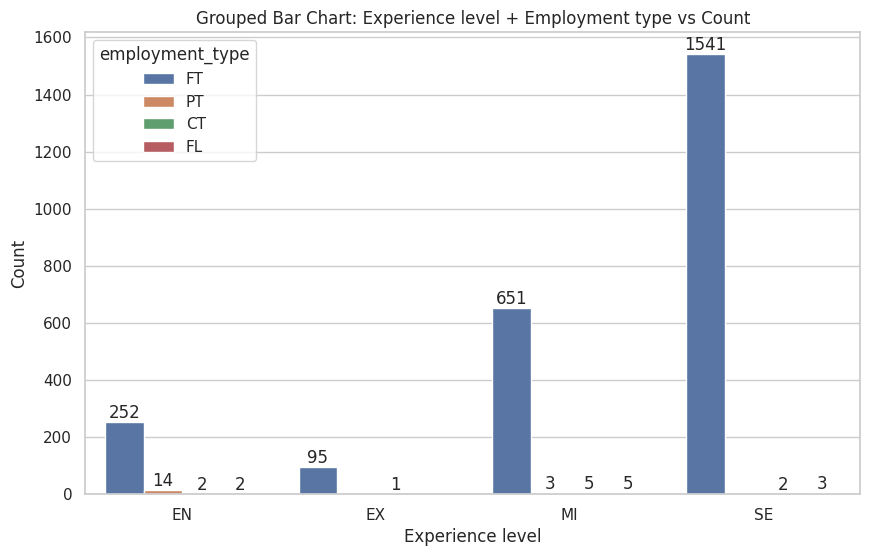

In [ ]:
#Plotting grouped bar chart for Experience Level count per employment type

sns.set(style="whitegrid")

# Plot the grouped bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
ax = sns.barplot(x='experience_level', y='Count', hue='employment_type',
                 data=employment_vs_experience_dt.reset_index())

# Add labels and title
plt.xlabel('Experience level')
plt.ylabel('Count')
plt.title('Grouped Bar Chart: Experience level + Employment type vs Count')

# Add values above bars
for j in ax.containers:
    ax.bar_label(j,)
# Show the plot
plt.show()

Finding correlation between numerical values of the dataset

In [ ]:
ds_salaries_df_cor = ds_salaries_df[['salary_in_usd','work_year','remote_ratio']]

#changing the work year into int
ds_salaries_df_cor['work_year'] = ds_salaries_df_cor['work_year'].astype(int)

#finding the correlation data
corr = ds_salaries_df_cor.corr()

corr

<ipython-input-63-16e78368ebc2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_salaries_df_cor['work_year'] = ds_salaries_df_cor['work_year'].astype(int)


,salary_in_usd,work_year,remote_ratio
salary_in_usd,1.000000,0.235672,-0.082760
work_year,0.235672,1.000000,-0.217165
remote_ratio,-0.082760,-0.217165,1.000000


Text(0.5, 1.0, 'Continuous-Continuous Correlation')

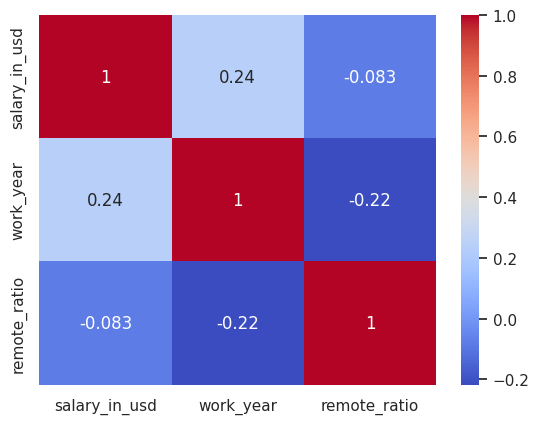

In [ ]:
#plotting heatmap for correlation
sns.heatmap(corr, annot=True, cmap='coolwarm')
ax.set_title('Continuous-Continuous Correlation')

# **DATA MODELLING**

**MULTIPLE LINEAR REGRESSION**

**Prepare Data:**

In [ ]:
# Filter data for US company locations and the required years (2020-2023)
us_predict_data = ds_salaries_df[
    (ds_salaries_df['company_location'] == 'US') &
    ((ds_salaries_df['work_year'] == '2020') |
     (ds_salaries_df['work_year'] == '2021') |
     (ds_salaries_df['work_year'] == '2022') |
     (ds_salaries_df['work_year'] == '2023'))
]

# Group by job title, work_year, and other specified columns to calculate average salary
grouped_data = us_predict_data.groupby(['job_title', 'work_year', 'experience_level', 'employment_type',
                                        'employee_residence', 'remote_ratio', 'company_location'])

# Calculate the mean salary for each group
avg_predict_salary = grouped_data['salary_in_usd'].mean().reset_index()

avg_predict_salary

,job_title,work_year,experience_level,employment_type,employee_residence,remote_ratio,company_location,salary_in_usd
0,AI Developer,2023,MI,FT,US,100,US,200000.000000
1,AI Scientist,2021,EN,PT,BR,100,US,12000.000000
2,AI Scientist,2021,EN,PT,PK,100,US,12000.000000
3,AI Scientist,2022,EN,FT,US,100,US,50000.000000
4,AI Scientist,2022,EX,FT,US,100,US,200000.000000
...,...,...,...,...,...,...,...,...
320,Research Scientist,2023,MI,FT,US,0,US,116250.000000
321,Research Scientist,2023,MI,FT,US,100,US,193633.333333
322,Research Scientist,2023,SE,FT,US,0,US,180548.823529
323,Research Scientist,2023,SE,FT,US,100,US,120000.000000


In [ ]:
# Create a feature for the year 2024
avg_predict_salary['work_year'] = pd.to_numeric(avg_predict_salary['work_year'])
avg_salary_2024 = avg_predict_salary.copy()
avg_salary_2024['work_year'] = 2024

# Encoding categorical variables (job_title, work_year) with drop_first=True
avg_salary_encoded = pd.get_dummies(avg_predict_salary[['job_title', 'work_year', 'experience_level',
                                                        'employment_type', 'employee_residence',
                                                       'remote_ratio', 'company_location']],
                                    drop_first=True)

In [ ]:
avg_predict_salary

,job_title,work_year,experience_level,employment_type,employee_residence,remote_ratio,company_location,salary_in_usd
0,AI Developer,2023,MI,FT,US,100,US,200000.000000
1,AI Scientist,2021,EN,PT,BR,100,US,12000.000000
2,AI Scientist,2021,EN,PT,PK,100,US,12000.000000
3,AI Scientist,2022,EN,FT,US,100,US,50000.000000
4,AI Scientist,2022,EX,FT,US,100,US,200000.000000
...,...,...,...,...,...,...,...,...
320,Research Scientist,2023,MI,FT,US,0,US,116250.000000
321,Research Scientist,2023,MI,FT,US,100,US,193633.333333
322,Research Scientist,2023,SE,FT,US,0,US,180548.823529
323,Research Scientist,2023,SE,FT,US,100,US,120000.000000


**Fitting the Multiple Linear Regression Model:**

In [ ]:
# Fit the multiple linear regression model
from sklearn import linear_model
lr = linear_model.LinearRegression()
predicted = lr.fit(X=avg_salary_encoded, y=avg_predict_salary['salary_in_usd'])

**Predict for the Year 2024:**

The key is to maintain consistency in data preprocessing steps, including encoding, between the training phase and the prediction phase to ensure that the model interprets the new data ('avg_salary_2024') correctly based on the encoding it learned during training. That's why we should once again use one hot encoding during the prediction phase to maintain consistency and ensure accurate predictions on new data.

In [ ]:
# Prepare data for predicting salaries in 2024
avg_salary_2024_encoded = pd.get_dummies(avg_salary_2024[['job_title', 'work_year','experience_level',
                                                        'employment_type', 'employee_residence',
                                                       'remote_ratio', 'company_location']], drop_first=True)

# Make predictions for 2024
predictions_2024 = lr.predict(avg_salary_2024_encoded)

In [ ]:
# Display the predictions for the year 2024
print("Predicted salaries for the year 2024:")
print(predictions_2024)

Predicted salaries for the year 2024:
[193581.81413191   2870.41887045  -7254.55760427 118170.51777327
 210070.49200251  74629.67152816 148208.27523701 144614.20830344
  94426.90935063 184529.8501131  122667.6333476  119073.56641403
  70801.76040542 145008.12216471 141414.05523114 184529.8501131
 122667.6333476  145008.12216471 141414.05523114 193743.38385526
 216083.87267238 123581.81413191 162918.74166691  19145.44239573
  62163.62826383 162918.74166691 187056.26395081 183462.19701724
 183462.19701724 188820.14267129 143630.03025757 192414.20960486
 188820.14267129  69332.11479083   -836.37173618 119913.32760491
  86744.41607654  58503.69207958  78622.09606676  17004.44239573
  83150.34914298  56706.6586128   53581.81413191 135563.77903493
  90373.6666212  139157.8459685  135563.77903493  44327.25652764
  72575.30514073  92826.43880215  89232.37186858  64585.71480519
  89232.37186858 111572.8606857   91029.40533537 167731.81413192
 230745.44239573 140745.44239573 148706.0545312  1487

In [ ]:
# Create a DataFrame for the predictions
predictions_df = pd.DataFrame({
    'job_title': avg_salary_2024['job_title'],
    'work_year': avg_salary_2024['work_year'],
    'avg_salary': predictions_2024
})

In [ ]:
# Display the predictions in a table format
predictions_df

,job_title,work_year,avg_salary
0,AI Developer,2024,193581.814132
1,AI Scientist,2024,2870.418870
2,AI Scientist,2024,-7254.557604
3,AI Scientist,2024,118170.517773
4,AI Scientist,2024,210070.492003
...,...,...,...
320,Research Scientist,2024,173928.286262
321,Research Scientist,2024,170334.219328
322,Research Scientist,2024,196268.775079
323,Research Scientist,2024,192674.708145


In [ ]:
# Round off the 'avg_salary' column to whole numbers
predictions_df['avg_salary'] = predictions_df['avg_salary'].round(0).astype(int)

In [ ]:
# Display the predictions in a table format
predictions_df

,job_title,work_year,avg_salary
0,AI Developer,2024,193582
1,AI Scientist,2024,2870
2,AI Scientist,2024,-7255
3,AI Scientist,2024,118171
4,AI Scientist,2024,210070
...,...,...,...
320,Research Scientist,2024,173928
321,Research Scientist,2024,170334
322,Research Scientist,2024,196269
323,Research Scientist,2024,192675


In [ ]:
predictions_df.to_csv('predictions_2024.csv', index=False)

In [ ]:
# Check for duplicate rows based on specific columns
duplicate_rows = avg_salary_2024.duplicated(subset=['job_title', 'work_year'], keep=False)
duplicates = avg_salary_2024[duplicate_rows]
print(duplicates)

              job_title  work_year experience_level employment_type  \
1          AI Scientist       2024               EN              PT   
2          AI Scientist       2024               EN              PT   
3          AI Scientist       2024               EN              FT   
4          AI Scientist       2024               EX              FT   
5          AI Scientist       2024               MI              FT   
..                  ...        ...              ...             ...   
319  Research Scientist       2024               EN              FT   
320  Research Scientist       2024               MI              FT   
321  Research Scientist       2024               MI              FT   
322  Research Scientist       2024               SE              FT   
323  Research Scientist       2024               SE              FT   

    employee_residence  remote_ratio company_location  salary_in_usd  
1                   BR           100               US   12000.000000  
2    

In [ ]:
# Remove duplicate rows based on specific columns
cleaned_avg_salary_2024 = avg_salary_2024.drop_duplicates(subset=['job_title', 'work_year'], keep='first')

In [ ]:
cleaned_avg_salary_2024

,job_title,work_year,experience_level,employment_type,employee_residence,remote_ratio,company_location,salary_in_usd
0,AI Developer,2024,MI,FT,US,100,US,200000.0
1,AI Scientist,2024,EN,PT,BR,100,US,12000.0
8,Analytics Engineer,2024,EN,FT,US,50,US,130000.0
19,Applied Data Scientist,2024,MI,FT,US,100,US,157000.0
21,Applied Machine Learning Engineer,2024,MI,FT,US,0,US,130000.0
...,...,...,...,...,...,...,...,...
302,Principal Machine Learning Engineer,2024,SE,FT,US,100,US,190000.0
303,Product Data Analyst,2024,EN,FT,US,100,US,100000.0
305,Research Engineer,2024,MI,FT,US,100,US,240000.0
311,Research Scientist,2024,MI,FT,US,0,US,450000.0


In [ ]:
cleaned_avg_salary_2024.to_csv('cleaned_predictions_2024.csv', index=False)

In [ ]:
# Calculate average salaries for 2023 (US salaries only)
avg_salary_2023 = ds_salaries_df[(ds_salaries_df['work_year'] == '2023') & (ds_salaries_df['employee_residence'] == 'US')].groupby('job_title')['salary_in_usd'].mean().reset_index()
avg_salary_2023.rename(columns={'salary_in_usd': 'avg_salary_2023'}, inplace=True)

In [ ]:
avg_salary_2023

,job_title,avg_salary_2023
0,AI Developer,200000.000000
1,Analytics Engineer,167162.307692
2,Applied Machine Learning Engineer,130000.000000
3,Applied Machine Learning Scientist,90000.000000
4,Applied Scientist,194951.000000
5,BI Analyst,132500.000000
6,BI Data Engineer,60000.000000
7,BI Developer,131000.000000
8,Business Data Analyst,105000.000000
9,Business Intelligence Engineer,174150.000000


In [ ]:
# Merge average salaries for 2023 and 2024 based on job titles
comparison_df = pd.merge(avg_salary_2023, cleaned_avg_salary_2024, on='job_title', how='inner')

# Display or analyze the differences between 2023 and 2024 salaries
comparison_df['salary_diff'] = comparison_df['salary_in_usd'] - comparison_df['avg_salary_2023']
comparison_df

,job_title,avg_salary_2023,work_year,experience_level,employment_type,employee_residence,remote_ratio,company_location,salary_in_usd,salary_diff
0,AI Developer,200000.000000,2024,MI,FT,US,100,US,200000.000000,0.000000
1,Analytics Engineer,167162.307692,2024,EN,FT,US,50,US,130000.000000,-37162.307692
2,Applied Machine Learning Engineer,130000.000000,2024,MI,FT,US,0,US,130000.000000,0.000000
3,Applied Machine Learning Scientist,90000.000000,2024,MI,FT,US,50,US,423000.000000,333000.000000
4,Applied Scientist,194951.000000,2024,SE,FT,US,100,US,181963.636364,-12987.363636
5,BI Analyst,132500.000000,2024,EN,FT,US,50,US,76000.000000,-56500.000000
6,BI Data Engineer,60000.000000,2024,EN,FT,US,100,US,60000.000000,0.000000
7,BI Developer,131000.000000,2024,SE,FT,US,100,US,130000.000000,-1000.000000
8,Business Data Analyst,105000.000000,2024,EN,CT,US,100,US,100000.000000,-5000.000000
9,Business Intelligence Engineer,174150.000000,2024,SE,FT,US,0,US,174150.000000,0.000000


In [ ]:
# Job titles with an upward trend (increase in salaries)
upward_trend = comparison_df[comparison_df['salary_diff'] > 0]['job_title'].tolist()
print("Job Titles with Upward Trend:")
print(upward_trend)

Job Titles with Upward Trend:
['Applied Machine Learning Scientist', 'Cloud Database Engineer', 'Data Infrastructure Engineer', 'Data Science Manager', 'Data Specialist', 'Deep Learning Engineer', 'Director of Data Science', 'Lead Data Analyst', 'Machine Learning Engineer', 'Machine Learning Infrastructure Engineer', 'Machine Learning Scientist', 'Machine Learning Software Engineer', 'Research Engineer', 'Research Scientist']


In [ ]:
# Job titles with a downward trend (decrease in salaries)
downward_trend = comparison_df[comparison_df['salary_diff'] < 0]['job_title'].tolist()
print("\nJob Titles with Downward Trend:")
print(downward_trend)


Job Titles with Downward Trend:
['Analytics Engineer', 'Applied Scientist', 'BI Analyst', 'BI Developer', 'Business Data Analyst', 'Computer Vision Engineer', 'Data Analyst', 'Data Analytics Manager', 'Data Architect', 'Data Engineer', 'Data Manager', 'Data Operations Engineer', 'Data Science Consultant', 'Data Science Lead', 'Data Scientist', 'Financial Data Analyst', 'Head of Data', 'Head of Data Science', 'NLP Engineer']


In [ ]:
# Job titles with a constant trend (no change in salaries)
constant_trend = comparison_df[comparison_df['salary_diff'] == 0]['job_title'].tolist()
print("Job Titles with Constant Trend:")
print(constant_trend)

Job Titles with Constant Trend:
['AI Developer', 'Applied Machine Learning Engineer', 'BI Data Engineer', 'Business Intelligence Engineer', 'Data Analytics Specialist', 'Data Lead', 'Data Modeler', 'Data Quality Analyst', 'Data Science Engineer', 'MLOps Engineer']


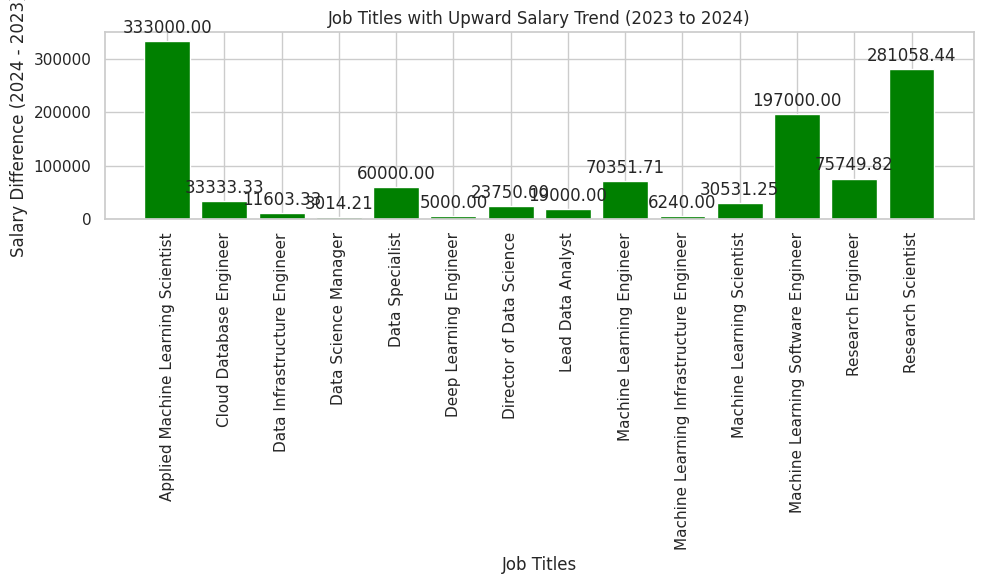

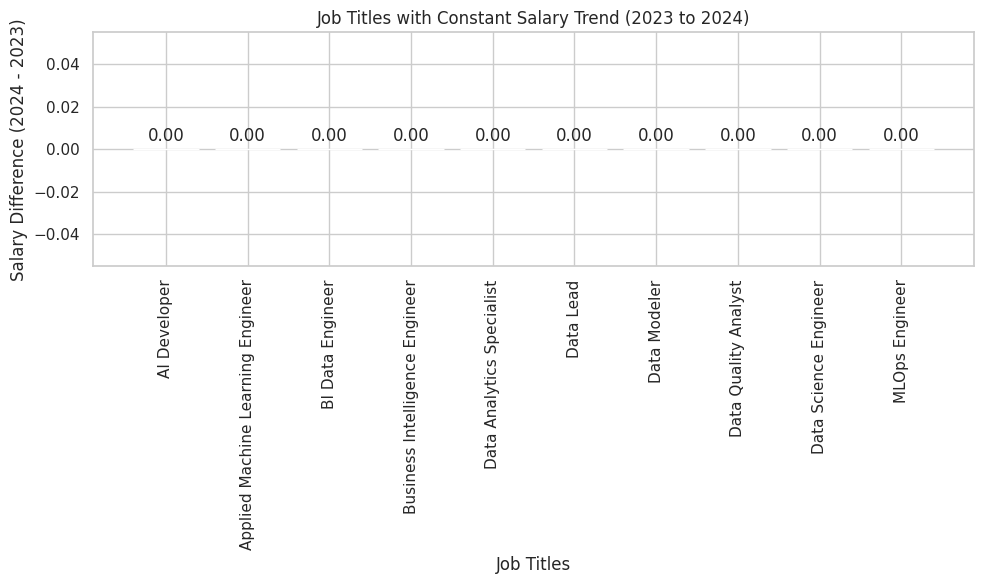

In [ ]:
import matplotlib.pyplot as plt

# DataFrames for each trend category
upward_trend_df = comparison_df[comparison_df['salary_diff'] > 0]
downward_trend_df = comparison_df[comparison_df['salary_diff'] < 0]
constant_trend_df = comparison_df[comparison_df['salary_diff'] == 0]

# Function to add value labels to bar plots with adjusted y-coordinate
def add_value_labels(ax):
    for bar in ax.containers:
        for rect in bar:
            height = rect.get_height()
            ax.annotate(f'{height:.2f}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # Adjusted distance above the x-axis
                        textcoords="offset points",
                        ha='center', va='bottom')

# Plotting for upward trend
plt.figure(figsize=(10, 6))
ax1 = plt.bar(upward_trend_df['job_title'], upward_trend_df['salary_diff'], color='green')
plt.xlabel('Job Titles')
plt.ylabel('Salary Difference (2024 - 2023)')
plt.title('Job Titles with Upward Salary Trend (2023 to 2024)')
plt.xticks(rotation=90)
plt.tight_layout()
add_value_labels(plt.gca())
plt.show()

# Plotting for constant trend
plt.figure(figsize=(10, 6))
ax3 = plt.bar(constant_trend_df['job_title'], constant_trend_df['salary_diff'], color='blue')
plt.xlabel('Job Titles')
plt.ylabel('Salary Difference (2024 - 2023)')
plt.title('Job Titles with Constant Salary Trend (2023 to 2024)')
plt.xticks(rotation=90)
plt.tight_layout()
add_value_labels(plt.gca())
plt.show()

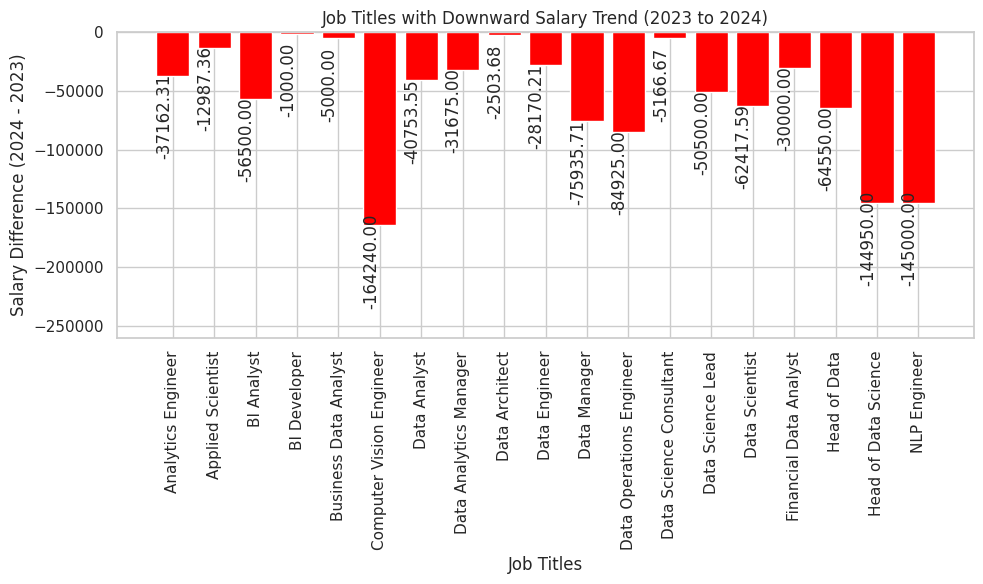

In [ ]:
# Function to add value labels with custom rotation and distance below the bars
def add_value_labels(ax, distance):
    for bar in ax.patches:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, -distance),  # Adjusted distance below the bar
                    textcoords="offset points",
                    rotation=90,  # Rotate the text by 45 degrees
                    ha='right',  # Horizontal alignment set to 'right' for better readability
                    va='bottom')

# Plotting for downward trend with adjusted value label position and rotation
plt.figure(figsize=(10, 6))
ax2 = plt.bar(downward_trend_df['job_title'], downward_trend_df['salary_diff'], color='red')
plt.xlabel('Job Titles')
plt.ylabel('Salary Difference (2024 - 2023)')
plt.title('Job Titles with Downward Salary Trend (2023 to 2024)')
plt.xticks(rotation=90)
plt.tight_layout()
add_value_labels(plt.gca(), 60)  # Adjusted distance of 6 cm (60 points) below each bar
plt.ylim(-260000, plt.gca().get_ylim()[1])  # Set y-axis limits from -260000 to current maximum
plt.show()